In [47]:
import pandas as pd
import numpy as np

In [15]:
df=pd.read_csv('Course+DataSet.csv',index_col='DATE',parse_dates=False)

In [16]:
df.head()

,Price
DATE,
01-01-1985,72.5052
02-01-1985,70.6720
03-01-1985,62.4502
04-01-1985,57.4714
05-01-1985,55.3151


In [5]:
df.tail()

,Price
DATE,
09-01-2017,98.6154
10-01-2017,93.6137
11-01-2017,97.3359
12-01-2017,114.7212
01-01-2018,129.4048


In [6]:
df.describe()

,Price
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [7]:
print(df.shape)

(397, 1)


In [8]:
df.size

397

<Axes: xlabel='DATE'>

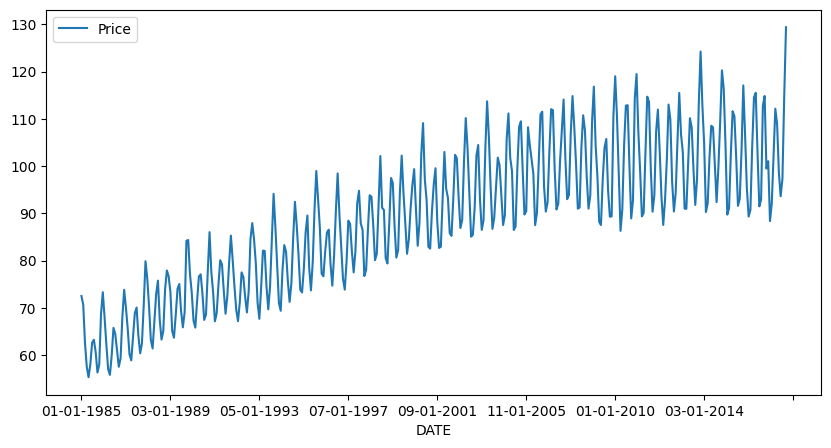

In [9]:
df.plot(figsize=(10,5))

In [10]:
start_date='01-01-1990'
end_date='01-01-2000'
timelim=(df.index >=start_date)&(df.index <end_date)
dataNew=df.iloc[timelim]

In [11]:
dataNew.head()

,Price
DATE,
01-01-1990,84.3598
01-01-1991,86.0214
01-01-1992,85.2855
01-01-1993,87.9464
01-01-1994,94.1386


In [12]:
dataNew.tail()

,Price
DATE,
01-01-1995,92.4532
01-01-1996,98.9732
01-01-1997,98.4613
01-01-1998,94.7920
01-01-1999,102.1348


<Axes: xlabel='DATE'>

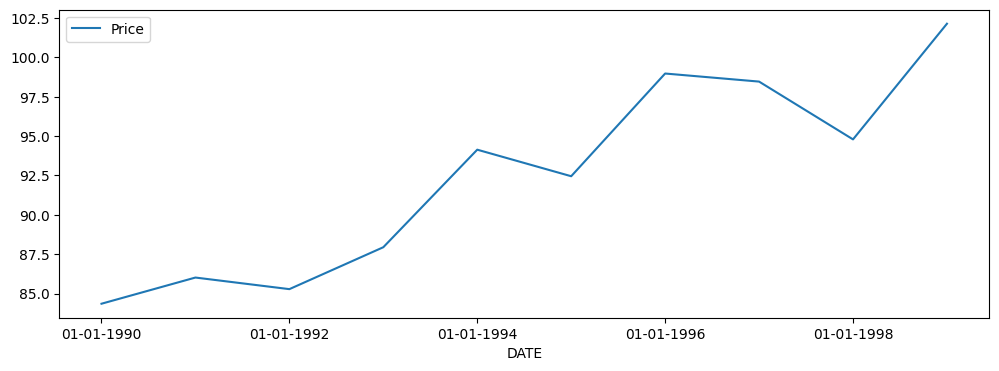

In [13]:
dataNew.plot(figsize=(12,4))

In [ ]:
DataQuarterly= df.rolling(window=8).mean()

<Axes: xlabel='DATE'>

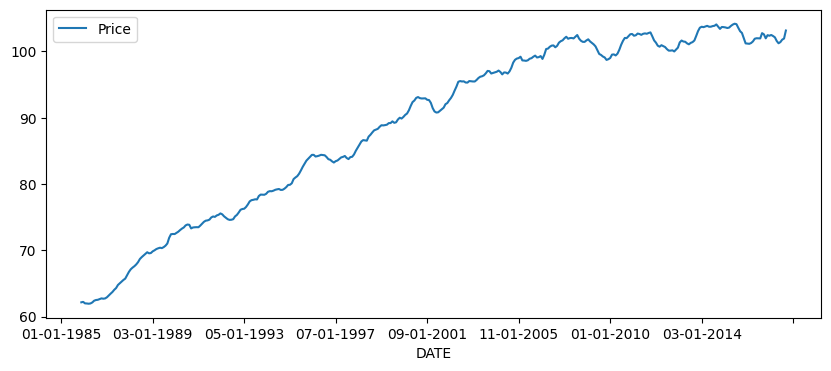

In [34]:
DataQuarterly.plot(figsize=(10,4))

In [31]:
DataQuarterly= df.rolling(window=12).mean()

<Axes: xlabel='DATE'>

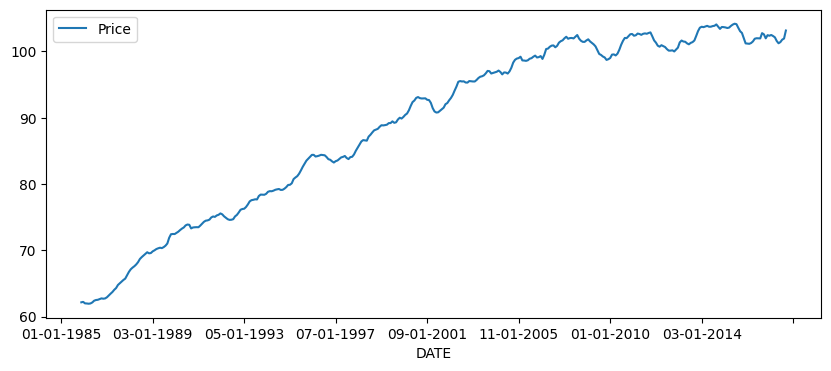

In [33]:
DataQuarterly.plot(figsize=(10,4))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

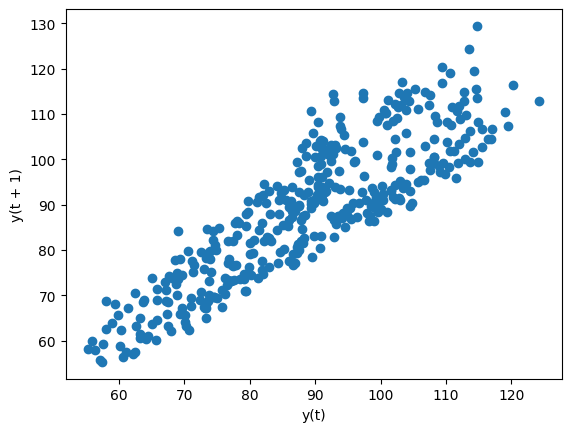

In [17]:
from pandas.plotting import lag_plot
lag_plot(df['Price'])

In [22]:
# Seasonality
start_date='01-01-2010'
end_date='01-01-2017'
timelim=(df.index >=start_date)&(df.index <end_date)
dataNew=df.iloc[timelim]

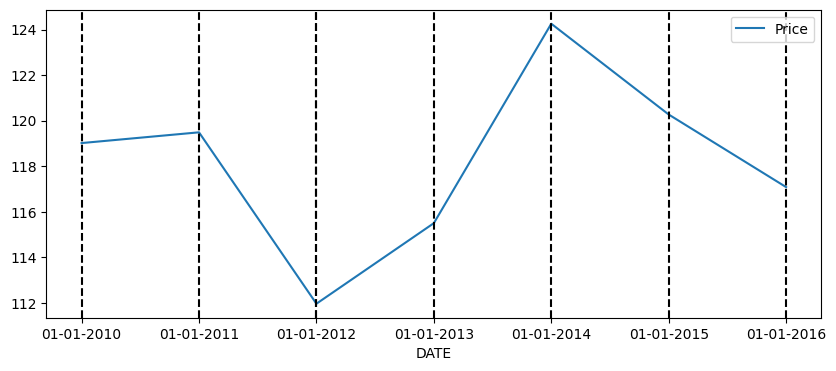

In [27]:
dataNew.plot(figsize=(10,4))
import matplotlib.pyplot as plt
coordinates = ['01-01-2010','01-01-2011','01-01-2012','01-01-2012','01-01-2013','01-01-2014','01-01-2015','01-01-2016']
for xc in coordinates:
    plt.axvline(x=xc,color='black',linestyle='--')

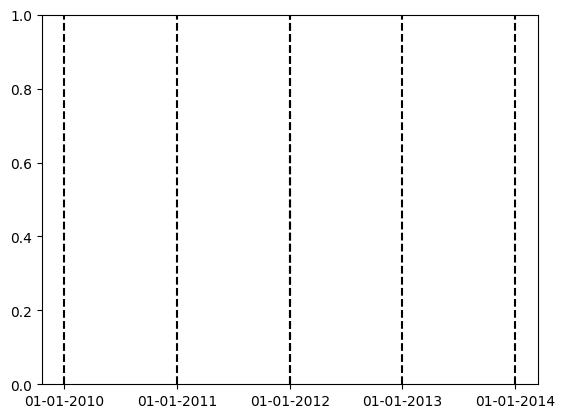

In [30]:
import matplotlib.pyplot as plt
coordinates = ['01-01-2010','01-01-2011','01-01-2012','01-01-2012','01-01-2013','01-01-2014']
for xc in coordinates:
    plt.axvline(x=xc,color='black',linestyle='--')

In [ ]:
# Test for Stationary

In [49]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series,autolag='AIC')
    labels=['ADF','P-values','Lag used','observation']
    out = pd.Series(result[0:4],index=labels)
    print(out.to_string())
    if result[1]<=0.005:
        print('Reject to null hypothesis')
    else:
        print('Failed to reject null hypothesis')

In [50]:
adf_test(df['Price'])

ADF             -2.256990
P-values         0.186215
Lag used        15.000000
observation    381.000000
Failed to reject null hypothesis


In [52]:
# Auto-corelation

autocorelation_lag1 = df['Price'].autocorr(lag=1)
print("Auto Coorelation Lag 1:", autocorelation_lag1)

Auto Coorelation Lag 1: 0.8717308657532125


In [53]:
# Auto-corelation

autocorelation_lag3 = df['Price'].autocorr(lag=3)
print("Auto Coorelation Lag 3:", autocorelation_lag3)

Auto Coorelation Lag 3: 0.5355867575850728


In [54]:
# Auto-corelation

autocorelation_lag6 = df['Price'].autocorr(lag=6)
print("Auto Coorelation Lag 6:", autocorelation_lag6)

Auto Coorelation Lag 6: 0.9266842332406332


In [55]:
# Auto-corelation

autocorelation_lag9 = df['Price'].autocorr(lag=9)
print("Auto Coorelation Lag 9:", autocorelation_lag9)

Auto Coorelation Lag 9: 0.5180088174990664


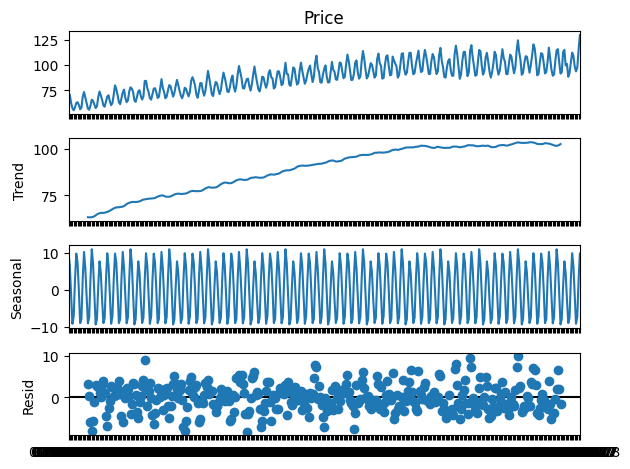

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df['Price'], model='additive', period=30)
decompose.plot()
plt.show()
